In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import json
import math
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from sklearn.neighbors import NearestCentroid

In [2]:
list_of_devices = []

f = open('workload2.json')
data = json.load(f)

for i in data:
    for t in data[i]:

        device = []
        device.append(i)
        device.append(t['device_id'])
        device.append(10 if t['class_of_service'] == 'standard' else 100)
        device.append(t['latency'][0])
        device.append(t['latency'][1])
        device.append(t['latency'][2])
        device.append(t['latency'][3])
        device.append(t['region'])

        list_of_devices.append(device)

devicesDf = pd.DataFrame(list_of_devices, columns=['Hour', 'Device_id', 'Class_of_service', 'Fog_latency_1', 'Fog_latency_2','Fog_latency_3', 'Cloud_latency', 'Regions'])
    
df_by_hour = devicesDf.groupby('Hour')

#Cada coluna 'dropada' é uma coluna que não vai entrar no kmeans
X = np.array(devicesDf.drop(['Device_id'], axis = 1))

#linkage = sch.linkage(X, method  = "ward")

hc = AgglomerativeClustering(n_clusters = 6, affinity = 'euclidean', linkage ='ward', compute_distances=True)
hc.fit_predict(X)

clf = NearestCentroid()
clf.fit(X, hc.fit_predict(X))
#hc = linkage(X, method='ward', metric="euclidean")

#fl = fcluster(hc,6,criterion='maxclust')

NearestCentroid()

In [3]:
print(clf.centroids_)

[[ 12.05739577  54.5631068   20.52222182 114.82637244 212.82637244
  196.           0.32830232]
 [ 11.95789797 100.          75.67503108  33.50823085 120.32496892
  196.           1.27219419]
 [ 12.02337229 100.         189.91273579  91.91273579  27.80203203
  196.           2.43788506]
 [ 11.81884058  10.         137.07843888  39.77257279  58.92156112
  196.           1.89875958]
 [ 12.05626223  10.          53.50172063  44.49827937 142.49827937
  196.           1.04593592]
 [ 12.00645578  10.         215.20665684 117.20665684  20.80643374
  196.           2.69598629]]


In [4]:
print(len(hc.distances_))

15965


In [5]:
devicesDf['K-class'] = hc.labels_
devicesDf

,Hour,Device_id,Class_of_service,Fog_latency_1,Fog_latency_2,Fog_latency_3,Cloud_latency,Regions,K-class
0,0,268730ee-d427-4381-a485-b5f254da7e5b,10,118.992363,20.992363,77.007637,196,1.714208,3
1,0,38d2b5a4-2c89-47e8-ada7-cfe85e653c33,100,77.093382,20.906618,118.906618,196,1.286667,1
2,0,a7c0fdf6-97bb-4987-a92d-76786e061e64,10,120.958843,22.958843,75.041157,196,1.734274,3
3,0,fda9991e-ff0c-40c7-bbdd-a57f6c3d79d1,100,11.592880,86.407120,184.407120,196,0.618295,0
4,0,bd1f98be-55ef-4a50-9d5f-84385fe60a21,10,190.116448,92.116448,5.883552,196,2.439964,5
...,...,...,...,...,...,...,...,...,...
15961,23,566d908e-f172-44f6-93b5-b6b89e5ddea8,100,74.126325,23.873675,121.873675,196,1.256391,1
15962,23,f4eb98b8-9b9e-4bf0-8ca5-00356e6cc291,10,34.243208,132.243208,230.243208,196,0.150580,0
15963,23,0486969f-1c06-4ced-b57f-8236572f19d4,100,157.943651,59.943651,38.056349,196,2.111670,2
15964,23,a7e38374-496b-466f-bfd4-d768b2e63e03,10,56.758690,41.241310,139.241310,196,1.079170,4


Latencia média =  24.42288115324755


c:\Users\mathe\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\Users\mathe\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\Users\mathe\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\Users\mathe\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\Users\mathe\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\Users\mathe\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

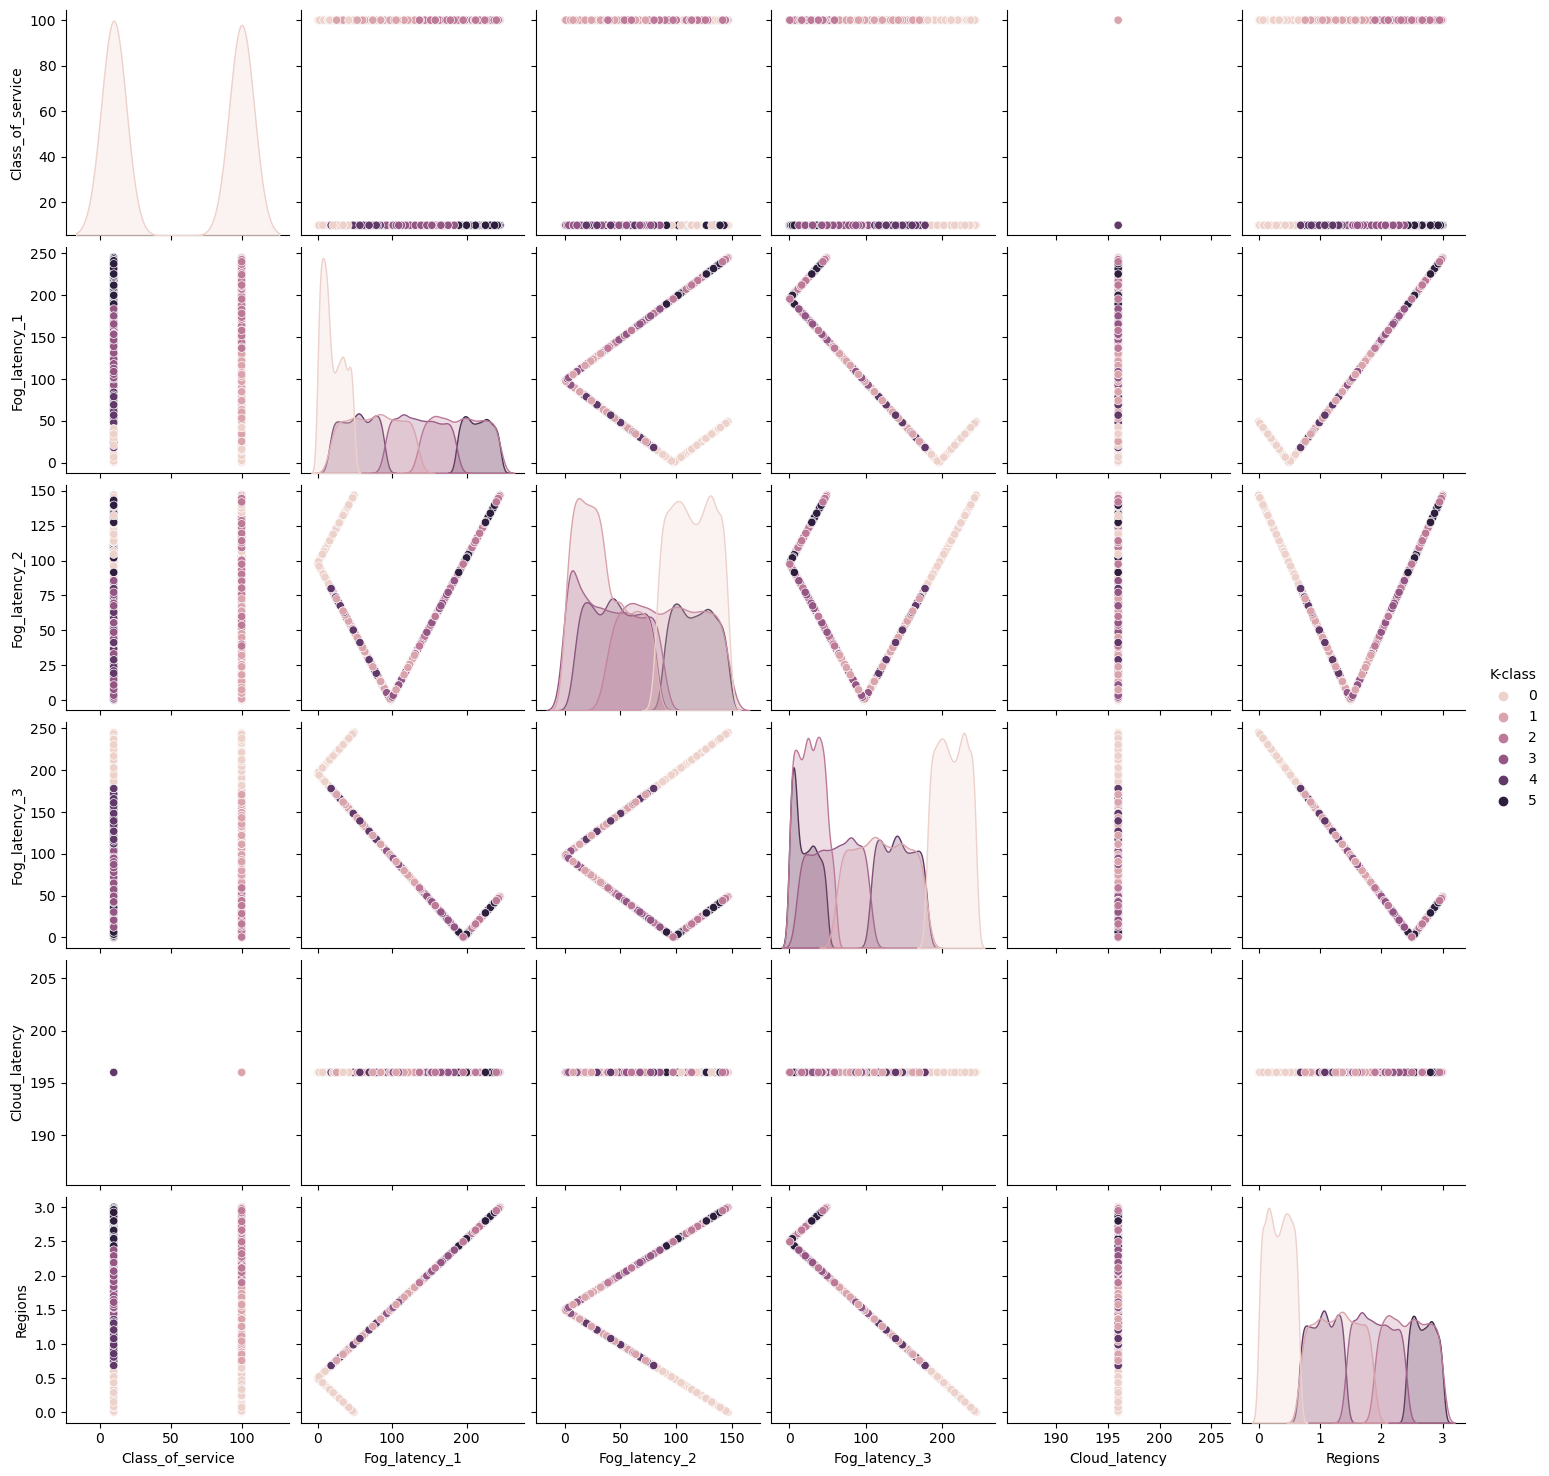

In [6]:
sum_smallest_latency = 0

for index in range(len(devicesDf)):
    smallest_latency = min([devicesDf["Fog_latency_1"].iloc[index], devicesDf["Fog_latency_2"].iloc[index], devicesDf["Fog_latency_3"].iloc[index]])
    sum_smallest_latency += smallest_latency

media_latency = sum_smallest_latency / devicesDf.shape[0]

print("Latencia média = ", media_latency)

sb.pairplot(devicesDf, hue="K-class")

<h1>ploting line graph standard and priority workload by time</h1>

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
Horário =  0
quantidade dispositivos prioritarios =  9
quantidade dispositivos standard =  9
Menor latencia media =  1.2242915399319477e-05
latencia média por CoS =  0.00011024291539931948
Horário =  1
quantidade dispositivos prioritarios =  18
quantidade dispositivos standard =  18
Menor latencia media =  1.108114352401965e-05
latencia média por CoS =  0.00010908114352401968
Horário =  2
quantidade dispositivos prioritarios =  35
quantidade dispositivos standard =  35
Menor latencia media =  1.0058144537394053e-05
latencia média por CoS =  0.00010805814453739407
Horário =  3
quantidade dispositivos prioritarios =  64
quantidade dispositivos standard =  64
Menor latencia media =  1.1908596390403219e-05
latencia média por CoS =  0.00010990859639040321
Horário =  4
quantidade dispositivos prioritarios =  108
quantidade dispositivos standard =  108
Menor latencia media =  1.2841872209440079e-05
latencia

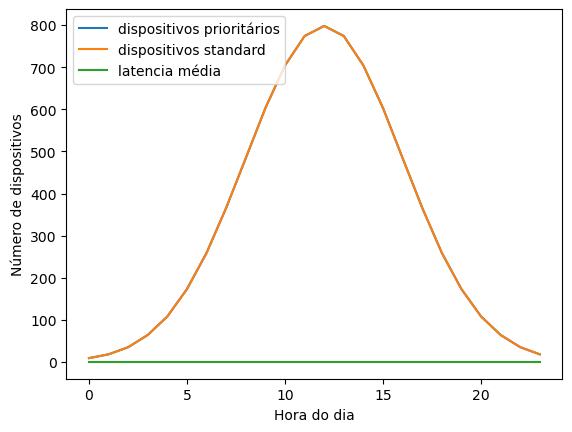

In [7]:
from cProfile import label
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import seaborn as sb
import json
import math
from sklearn.cluster import AgglomerativeClustering 

list_of_devices = []

f = open('workload2.json')
data = json.load(f)

for i in data:
    for t in data[i]:

        device = []
        device.append(i)
        device.append(t['device_id'])
        device.append(10 if t['class_of_service'] == 'standard' else 100)
        device.append(t['latency'][0] * (10**-6))
        device.append(t['latency'][1] * (10**-6))
        device.append(t['latency'][2] * (10**-6))
        device.append(t['latency'][3] * (10**-6))
        device.append(t['region'])

        list_of_devices.append(device)

devicesDf = pd.DataFrame(list_of_devices, columns=['Hour', 'Device_id', 'Class_of_service', 'Fog_latency_1', 'Fog_latency_2','Fog_latency_3', 'Cloud_latency', 'Regions'])
    
df_by_hour = dict(tuple(devicesDf.groupby('Hour')))
print(list(range(len(df_by_hour))))

latency_list_by_priority = []
num_priority_by_hour = []
num_standard_by_hour = []

for i in range(len(df_by_hour)):
    print("Horário = ", i)
    sum_smallest_latency = 0
    num_priority = 0
    num_standard = 0
    latency_by_priority = 0

    for index in range(len(df_by_hour[str(i)])):
        if df_by_hour[str(i)]['Class_of_service'].iloc[index] == 100:
            smallest_latency = min([df_by_hour[str(i)]["Fog_latency_1"].iloc[index], df_by_hour[str(i)]["Fog_latency_2"].iloc[index], df_by_hour[str(i)]["Fog_latency_3"].iloc[index]])
            sum_smallest_latency += smallest_latency
            num_priority += 1
            latency_by_priority += smallest_latency
        else:
            num_standard += 1
            latency_by_priority += df_by_hour[str(i)]['Cloud_latency'].iloc[index]

    media_priority_latency = latency_by_priority / df_by_hour[str(i)].shape[0]
    media_smallest_latency = sum_smallest_latency / df_by_hour[str(i)].shape[0]
    X = np.array(df_by_hour[str(i)].drop(['Device_id', 'Hour'], axis = 1))

    #aplicação do Ward Linkage
    hc = AgglomerativeClustering(n_clusters = 6, affinity = 'euclidean', linkage ='ward')
    hc.fit_predict(X)

    df_by_hour[str(i)]['K-class'] = hc.labels_

    print("quantidade dispositivos prioritarios = ", num_priority)
    print("quantidade dispositivos standard = ", num_standard)

    print("Menor latencia media = ", media_smallest_latency)
    print("latencia média por CoS = ", media_priority_latency)

    latency_list_by_priority.append(media_priority_latency)
    num_priority_by_hour.append(num_priority)
    num_standard_by_hour.append(num_standard)

pl.plot(list(range(len(df_by_hour))), num_priority_by_hour, label="dispositivos prioritários")
pl.plot(list(range(len(df_by_hour))), num_standard_by_hour, label="dispositivos standard")
pl.plot(list(range(len(df_by_hour))), latency_list_by_priority, label="latencia média")
pl.xlabel("Hora do dia")
pl.ylabel("Número de dispositivos")
pl.legend(['dispositivos prioritários', 'dispositivos standard', 'latencia média'])
pl.show()

## Function: alocation_by_priority<br>
Devices alocation based on priority of execution.<br>
Priority devices are connected to the fog nodes and standard devices are connected to the cloud processing node.

### Input:
> devices_regions : list [regions][devices]<br> 
> processing_nodes : list [fog and cloud nodes]<br>

### Return:
> latency_by_priority : float [all latency values from that specific alocation]<br>
> num_priority : int [number of priority devices]<br>
> num_standard : int [number of standard devices]<br>

In [8]:
def alocation_by_priority(devices_regions, processing_nodes):
    latency_by_priority = 0
    standard_latency = 0
    num_priority = 0
    num_standard = 0
    package_size = 1966*(10**6)
    data_link_capacity = 10 * (10**9)
    transmission_latency = package_size / data_link_capacity * (10**3)

    print("Transmission latency: ", transmission_latency)

    for region in range(len(devices_regions)):
        for index in range(len(devices_regions[region])):
            # verify the priority and the availability of the fog node
            if devices_regions[int(region)][index]["Class_of_service"] == 100 and len(processing_nodes[int(region)].connected_devices) < processing_nodes[int(region)].device_capacity:
                processing_nodes[region].connected_devices.append(
                    devices_regions[region][index])
            else:
                processing_nodes[-1].connected_devices.append(
                    devices_regions[region][index])

    for region in range(len(processing_nodes)):
        for devices in processing_nodes[region].connected_devices:
            fog_node_id = "Fog_latency_" + str(region+1)
            if devices["Class_of_service"] == 100:
                num_priority += 1
                if region == 3:
                    latency_by_priority += devices["Cloud_latency"] + transmission_latency
                else:
                    latency_by_priority += devices[fog_node_id] + transmission_latency
            elif devices["Class_of_service"] == 10:
                num_standard += 1
                if region == 3:
                    standard_latency += devices["Cloud_latency"] + transmission_latency
                else:
                    standard_latency += devices[fog_node_id] + transmission_latency
    
    return latency_by_priority, standard_latency, num_priority, num_standard

## Function: fog_first_alocation<br>
Fog first alocation aims to use all capacity of the fog nodes before starts to use the cloud processing node.<br>
Devices that are standard and are connected to the fog node can be relocated to the cloud if a priority user needs to processed in the fog node.

### Input:
> devices_regions : list [regions][devices]<br> 
> processing_nodes : list [fog and cloud nodes]<br>

### Return:
> latency_by_priority : float [all latency values from that specific alocation]<br>
> num_priority : int [number of priority devices]<br>
> num_standard : int [number of standard devices]<br>

In [9]:
def fog_first_alocation(devices_regions, processing_nodes):
    latency_by_priority = 0
    standard_latency = 0
    num_priority = 0
    num_standard = 0
    package_size = 1966*(10**6)
    data_link_capacity = 10 * (10**9)
    transmission_latency = package_size / data_link_capacity * (10**3)
    
    for region in range(len(devices_regions)):
        for index in range(len(devices_regions[region])):
            # verify the priority and the availability of the fog node
            fog_node_id = "Fog_latency_" + str(region+1)
            if len(processing_nodes[region].connected_devices) < processing_nodes[region].device_capacity:
                processing_nodes[region].connected_devices.append(
                    devices_regions[region][index])
            else:
                # search for no_priority device connected to fog node
                non_priority_in_fog = False
                for device_index in range(len(processing_nodes[region].connected_devices)):
                    if processing_nodes[region].connected_devices[device_index]["Class_of_service"] == 10:
                        non_priority_in_fog = True
                        no_priority_device = processing_nodes[region].connected_devices[device_index]
                        
                        # disconnect device from fog node
                        processing_nodes[region].connected_devices.pop(device_index)
                        
                        # connect no-priority device on cloud node    
                        processing_nodes[-1].connected_devices.append(
                            no_priority_device)

                        # connect new priority device on the fog node
                        processing_nodes[region].connected_devices.append(devices_regions[region][index])
                        break
                # if no no-priority device is found, just connect to the cloud
                if non_priority_in_fog == False:
                    processing_nodes[-1].connected_devices.append(
                        devices_regions[region][index])

    for region in range(len(processing_nodes)):
        for devices in processing_nodes[region].connected_devices:
            fog_node_id = "Fog_latency_" + str(region+1)
            if devices["Class_of_service"] == 100:
                num_priority += 1
                if region == 3:
                    latency_by_priority += devices["Cloud_latency"] + transmission_latency
                else:
                    latency_by_priority += devices[fog_node_id] + transmission_latency
            elif devices["Class_of_service"] == 10:
                num_standard += 1
                if region == 3:
                    standard_latency += devices["Cloud_latency"] + transmission_latency
                else:
                    standard_latency += devices[fog_node_id] + transmission_latency

    print("numero prioritarios: ", num_priority)
    print("numero standard: ", num_standard)
    return latency_by_priority, standard_latency, num_priority, num_standard

## Function: alocation_cloud_only<br>
Cloud only aims to use only the processing capacity of the cloud node not caring about its processing capacity. If the demand is greater, devices are alocated to a processing queue.
### Input:
> devices_regions : list [regions][devices]<br> 
> processing_nodes : list [fog and cloud nodes]<br>

### Return:
> latency_by_priority : float [all latency values from that specific alocation]<br>
> num_priority : int [number of priority devices]<br>
> num_standard : int [number of standard devices]<br>

In [10]:
def alocation_cloud_only(devices_regions, processing_nodes):
    latency_by_priority = 0
    standard_latency = 0
    num_priority = 0
    num_standard = 0
    package_size = 1966*(10**6)
    data_link_capacity = 10 * (10**9)
    transmission_latency = package_size / data_link_capacity * (10**3)

    for region in range(len(devices_regions)):
        for index in range(len(devices_regions[region])):
            # verify the priority and the availability of the fog node
            if len(processing_nodes[-1].connected_devices) < processing_nodes[-1].device_capacity:
                processing_nodes[-1].connected_devices.append(
                    devices_regions[region][index])
            else:
                non_priority_processing = False
                for device_index in range(len(processing_nodes[-1].connected_devices)):
                    if processing_nodes[-1].connected_devices[device_index]["Class_of_service"] == 10:
                        non_priority_processing = True
                        no_priority_device = processing_nodes[-1].connected_devices[device_index]
                        # disconnect device from fog node
                        processing_nodes[-1].connected_devices.pop(device_index)
                        # connect no-priority device on cloud node  
                        processing_nodes[-1].queue_devices.append(
                            no_priority_device)
                        # connect new priority device on the fog node
                        processing_nodes[-1].connected_devices.append(devices_regions[region][index])

                        break
                
                # if no no-priority device is found, just connect to the cloud
                if non_priority_processing == False:
                    processing_nodes[-1].queue_devices.append(
                        devices_regions[region][index])


    priority_queue_devices = 0
    priority_queue_latency = 0
    standard_queue_devices = 0
    standard_queue_latency = 0
    for devices in processing_nodes[-1].connected_devices:
        if devices["Class_of_service"] == 100:
            num_priority += 1
            latency_by_priority += devices["Cloud_latency"] + transmission_latency
        elif devices["Class_of_service"] == 10:
            num_standard += 1
            standard_latency += devices["Cloud_latency"] + transmission_latency

    for devices in processing_nodes[-1].queue_devices:
        if devices["Class_of_service"] == 100:
            num_priority += 1
            priority_queue_devices += 1
            latency_by_priority += devices["Cloud_latency"] + (priority_queue_devices * 100) + transmission_latency
            priority_queue_latency += (priority_queue_devices * 100)
        elif devices["Class_of_service"] == 10:
            num_standard += 1
            standard_queue_devices += 1
            standard_latency += devices["Cloud_latency"] + (standard_queue_devices * 100) + transmission_latency
            standard_queue_latency += (standard_queue_devices * 100)

    
    return latency_by_priority, standard_latency, num_priority, num_standard, priority_queue_devices, standard_queue_devices, priority_queue_latency, standard_queue_latency

## Function: alocation_fog_only<br>
Fog only aims to use only the processing capacity of the fog node not caring about its processing capacity. If the demand is greater, devices are alocated to a processing queue.
### Input:
> devices_regions : list [regions][devices]<br> 
> processing_nodes : list [fog and cloud nodes]<br>

### Return:
> latency_by_priority : float [all latency values from that specific alocation]<br>
> num_priority : int [number of priority devices]<br>
> num_standard : int [number of standard devices]<br>

In [11]:
def alocation_fog_only(devices_regions, processing_nodes):
    latency_by_priority = 0
    standard_latency = 0
    num_priority = 0
    num_standard = 0
    package_size = 1966*(10**6)
    data_link_capacity = 10 * (10**9)
    transmission_latency = package_size / data_link_capacity * (10**3)

    for region in range(len(devices_regions)):
        for index in range(len(devices_regions[region])):
            # verify the priority and the availability of the fog node
            if len(processing_nodes[region].connected_devices) < processing_nodes[region].device_capacity:
                processing_nodes[region].connected_devices.append(
                    devices_regions[region][index])
            else:
                non_priority_processing = False
                for device_index in range(len(processing_nodes[region].connected_devices)):
                    if processing_nodes[region].connected_devices[device_index]["Class_of_service"] == 10:
                        non_priority_processing = True
                        no_priority_device = processing_nodes[region].connected_devices[device_index]
                        # disconnect device from fog node
                        processing_nodes[region].connected_devices.pop(device_index)
                        # connect no-priority device on cloud node    
                        processing_nodes[region].queue_devices.append(
                            no_priority_device)
                        # connect new priority device on the fog node
                        processing_nodes[region].connected_devices.append(devices_regions[region][index])
                        break
                
                if non_priority_processing == False:
                    # if no no-priority device in found, just connect to the cloud
                    processing_nodes[region].queue_devices.append(
                        devices_regions[region][index])


    total_priority_queue_latency = 0
    total_standard_queue_latency = 0
    for region in range(len(processing_nodes) - 1):
        priority_queue_devices = 0
        standard_queue_devices = 0
        fog_node_id = "Fog_latency_" + str(region+1)
        for devices in processing_nodes[region].connected_devices:
            if devices["Class_of_service"] == 100:
                num_priority += 1
                latency_by_priority += devices[fog_node_id] + transmission_latency
            else:
                standard_latency += devices[fog_node_id] + transmission_latency
                num_standard += 1
        for devices in processing_nodes[region].queue_devices:
            if devices["Class_of_service"] == 100:
                num_priority += 1
                priority_queue_devices += 1
                latency_by_priority += devices[fog_node_id] + (priority_queue_devices * 100) + transmission_latency
                total_priority_queue_latency += (priority_queue_devices * 100)
            else:
                num_standard += 1
                standard_queue_devices += 1
                standard_latency += devices[fog_node_id] + (standard_queue_devices * 100) + transmission_latency
                total_standard_queue_latency += (standard_queue_devices * 100)

    return latency_by_priority, standard_latency, num_priority, num_standard, priority_queue_devices, standard_queue_devices, total_priority_queue_latency, total_standard_queue_latency

### Clustering and getting ready for alocation processes

In [12]:
from cProfile import label
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import seaborn as sb
import json
import math
from sklearn.cluster import AgglomerativeClustering 
import utilities
import time
import timeit

list_of_devices = []

latency_list_by_priority = []
num_priority_by_hour = []
num_standard_by_hour = []

devices_regions_by_hour = []

f = open('workload2.json')
data = json.load(f)

for i in data:
    for t in data[i]:

        device = []
        device.append(i)
        device.append(t['device_id'])
        device.append(10 if t['class_of_service'] == 'standard' else 100)
        for fog_latency in range(len(t['latency'])):
            device.append(t['latency'][fog_latency] * (10**-3))
        device.append(t['region'])

        list_of_devices.append(device)

devicesDf = pd.DataFrame(list_of_devices, columns=['Hour', 'Device_id', 'Class_of_service',
                         'Fog_latency_1', 'Fog_latency_2', 'Fog_latency_3', 'Cloud_latency', 'Regions'])

df_by_hour = dict(tuple(devicesDf.groupby('Hour')))
print(list(range(len(df_by_hour))))

# loop by hour of the workload database
for i in range(len(df_by_hour)):
    print("Horário = ", i)
    sum_smallest_latency = 0
    num_priority = 0
    num_standard = 0
    latency_by_priority = 0
    processing_nodes = utilities.instantiate_processing_nodes(1, 3)

    # removing some unused columns
    X = np.array(df_by_hour[str(i)].drop(
        ['Device_id', 'Hour'], axis=1))

    #aplicação do Ward Linkage
    hc = AgglomerativeClustering(n_clusters = 6, affinity = 'euclidean', linkage ='ward', compute_distances=True)
    y_hc = hc.fit_predict(X)
    # add cluster label to each device
    df_by_hour[str(i)]['K-class'] = y_hc

    clf = NearestCentroid()
    clf.fit(X, y_hc)

    centers = clf.centroids_
    
    # get region centroid for each cluster and put it on a list with the cluster label
    # gonna be used to define the processing node each device will go depending of the cluster they're in
    ordered_clusters = []
    for cluster_index in range(len(centers)):
        # hardcoded -1 - last element on the centers is the centroid of the region
        ordered_clusters.append((centers[cluster_index][-1], cluster_index))

    # sort list of centroid and label of each cluster by the centroid
    ordered_clusters.sort()
    print(ordered_clusters)

    # list of devices for each region
    devices_regions = []
    devices_region_1 = []
    devices_region_2 = []
    devices_region_3 = []

    # loop through all devices in this hour
    # and stores than in its own region to be connected
    for devices in range(len(df_by_hour[str(i)])):
        device = df_by_hour[str(i)]['K-class'].iloc[devices]

        # ordered_cluster getting the index of the k-class refering to each region
        if device == ordered_clusters[0][1] or device == ordered_clusters[1][1]:
            devices_region_1.append(df_by_hour[str(i)].iloc[devices])
        elif device == ordered_clusters[2][1] or device == ordered_clusters[3][1]:
            devices_region_2.append(df_by_hour[str(i)].iloc[devices])
        elif device == ordered_clusters[4][1] or device == ordered_clusters[5][1]:
            devices_region_3.append(df_by_hour[str(i)].iloc[devices])

    devices_regions.append(devices_region_1)
    devices_regions.append(devices_region_2)
    devices_regions.append(devices_region_3)

    devices_regions_by_hour.append(devices_regions)



[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
Horário =  0
[(0.41088417110875436, 4), (0.9474039939082773, 3), (1.232603021379081, 0), (1.742726842024113, 5), (2.6646086725190354, 2), (2.6700392811830667, 1)]
Horário =  1
[(0.2934522072580267, 3), (0.3287378617076201, 5), (1.329799470300387, 1), (1.6027861030416126, 0), (2.4796596505159916, 2), (2.778541261180625, 4)]
Horário =  2
[(0.3784969560862039, 2), (0.461971504310954, 3), (1.294289701087995, 5), (1.3939099764613607, 4), (2.2253198199269804, 0), (2.3649549640862166, 1)]
Horário =  3
[(0.3588497059836479, 3), (0.3679337842752531, 5), (1.1472812553413587, 1), (1.592723533720648, 0), (2.28638889737203, 2), (2.704185294771411, 4)]
Horário =  4
[(0.3637248892182365, 5), (0.4503964550012459, 3), (1.2458992428623463, 2), (1.5399988842195256, 1), (2.352863092637803, 0), (2.5349563532378436, 4)]
Horário =  5
[(0.43057245693674057, 1), (0.6480787521812145, 2), (1.6815859115958538, 0), (1.7618741434

### Alocation by priority

Hour:  0
Transmission latency:  196.6
Latency by priority:  1769.6528745518247  num_priority:  9
Latencia media:  196.62809717242496
Latency cloud:  1771.1640000000002  num_standard:  9
Latencia standard media:  196.79600000000002
Porcentagem latencia prop [priority]:  0.01428950024386659
Porcentagem latencia prop [standard]:  0.09959552023416449
Hour:  1
Transmission latency:  196.6
Latency by priority:  3539.219673520201  num_priority:  18
Latencia media:  196.62331519556673
Latency cloud:  3542.327999999999  num_standard:  18
Latencia standard media:  196.79599999999994
Porcentagem latencia prop [priority]:  0.011857798015229376
Porcentagem latencia prop [standard]:  0.09959552023412122
Hour:  2
Transmission latency:  196.6
Latency by priority:  6881.733125488284  num_priority:  35
Latencia media:  196.62094644252238
Latency cloud:  6887.860000000002  num_standard:  35
Latencia standard media:  196.79600000000008
Porcentagem latencia prop [priority]:  0.010653210098604779
Porcentage

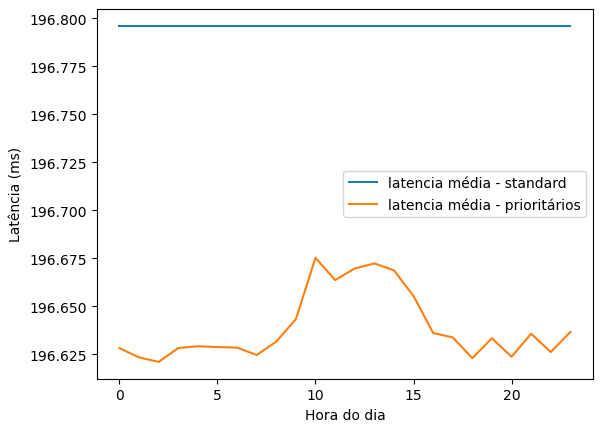

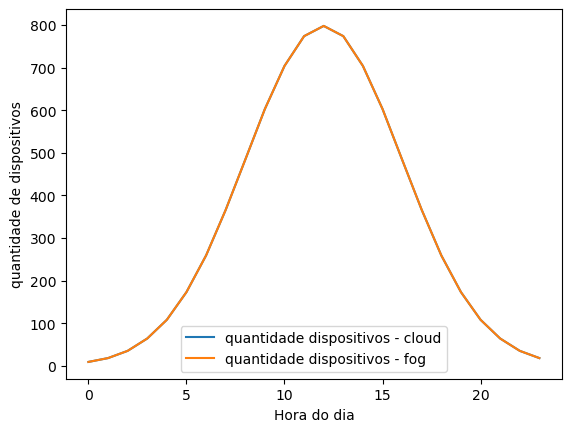

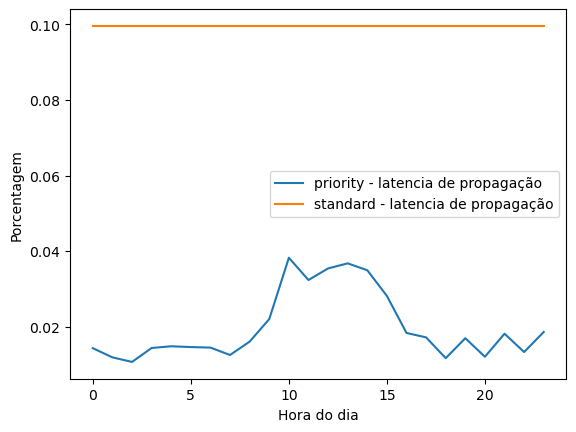

media prop latency priority:  0.019887130848784074
media prop latency standard:  0.09959552023443861


In [13]:
latency_list_fog_by_priority = []
latency_list_cloud_by_priority = []
all_devices_latency_mean_by_priority = []
num_priority_by_hour = []
num_standard_by_hour = []
perc_prop_latency_priority_list = []
perc_prop_latency_standard_list = []
package_size = 1966*(10**6)
data_link_capacity = 10 * (10**9)
transmission_latency = (package_size / data_link_capacity) * (10**3)

for i in range(len(df_by_hour)):
    print("Hour: ", i)
    sum_smallest_latency = 0
    num_priority = 0
    num_standard = 0
    latency_by_priority = 0
    processing_nodes = utilities.instantiate_processing_nodes(1, 3)
    #######################################################
    # alocation of the devices in each region of fog node
    # ALOCATION BY PRIORITY #
    ######################################################
    latency_by_priority, cloud_latency, num_priority, num_standard = alocation_by_priority(devices_regions_by_hour[i], processing_nodes)
    #result = timeit.timeit(stmt='alocation_by_priority(devices_regions_by_hour[i], processing_nodes)', globals=globals(), number=1)
    #print("Alocation process time: ", result)

    media_priority_latency = latency_by_priority / num_priority
    media_cloud_latency = cloud_latency / num_standard
    all_devices_mean = (latency_by_priority + cloud_latency) / (num_priority + num_standard)
    
    print("Latency by priority: ", latency_by_priority, " num_priority: ", num_priority)
    print("Latencia media: ", media_priority_latency)

    print("Latency cloud: ", cloud_latency, " num_standard: ", num_standard)
    print("Latencia standard media: ", media_cloud_latency)
    latency_list_fog_by_priority.append(media_priority_latency)
    latency_list_cloud_by_priority.append(media_cloud_latency)
    all_devices_latency_mean_by_priority.append(all_devices_mean)
    num_priority_by_hour.append(num_priority)
    num_standard_by_hour.append(num_standard)

    propagation_latency_priority = media_priority_latency - transmission_latency
    perc_prop_latency_priority = (propagation_latency_priority * 100) / media_priority_latency

    propagation_latency_standard = media_cloud_latency - transmission_latency
    perc_prop_latency_standard = (propagation_latency_standard * 100) / media_cloud_latency

    perc_prop_latency_priority_list.append(perc_prop_latency_priority)
    perc_prop_latency_standard_list.append(perc_prop_latency_standard)
    print("Porcentagem latencia prop [priority]: ", perc_prop_latency_priority)
    print("Porcentagem latencia prop [standard]: ", perc_prop_latency_standard)

pl.plot(list(range(len(df_by_hour))), latency_list_cloud_by_priority, label="latencia média - standard")
pl.plot(list(range(len(df_by_hour))), latency_list_fog_by_priority, label="latencia média - prioritários")
pl.xlabel("Hora do dia")
pl.ylabel("Latência (ms)")
pl.legend(['latencia média - standard', 'latencia média - prioritários'])
pl.show()

pl.plot(list(range(len(df_by_hour))), num_standard_by_hour, label="quantidade dispositivos - cloud")
pl.plot(list(range(len(df_by_hour))), num_priority_by_hour, label="quantidade dispositivos - fog")
pl.xlabel("Hora do dia")
pl.ylabel("quantidade de dispositivos")
pl.legend(['quantidade dispositivos - cloud', 'quantidade dispositivos - fog'])
pl.show()

pl.plot(list(range(len(df_by_hour))), perc_prop_latency_priority_list, label="latencia de propagação - priority")
pl.plot(list(range(len(df_by_hour))), perc_prop_latency_standard_list, label="latencia de propagação - standard")
pl.xlabel("Hora do dia")
pl.ylabel("Porcentagem")
pl.legend(['priority - latencia de propagação', 'standard - latencia de propagação'])
pl.show()

print("media prop latency priority: ", np.mean(perc_prop_latency_priority_list))
print("media prop latency standard: ", np.mean(perc_prop_latency_standard_list))

### Alocation - Fog First

Hour:  0
numero prioritarios:  9
numero standard:  9
Latencia media prioritarios:  196.62809717242496
Latencia media standard:  196.6271776397499
Porcentagem latencia prop [priority]:  0.01428950024386659
Porcentagem latencia prop [standard]:  0.013821914181009925
Hour:  1
numero prioritarios:  18
numero standard:  18
Latencia media prioritarios:  196.62331519556673
Latencia media standard:  196.63012202030743
Porcentagem latencia prop [priority]:  0.011857798015229376
Porcentagem latencia prop [standard]:  0.015319128116250627
Hour:  2
numero prioritarios:  35
numero standard:  35
Latencia media prioritarios:  196.62094644252238
Latencia media standard:  196.63029667127876
Porcentagem latencia prop [priority]:  0.010653210098604779
Porcentagem latencia prop [standard]:  0.015407936514183974
Hour:  3
numero prioritarios:  64
numero standard:  64
Latencia media prioritarios:  196.62820202920474
Latencia media standard:  196.6340645829783
Porcentagem latencia prop [priority]:  0.01434282

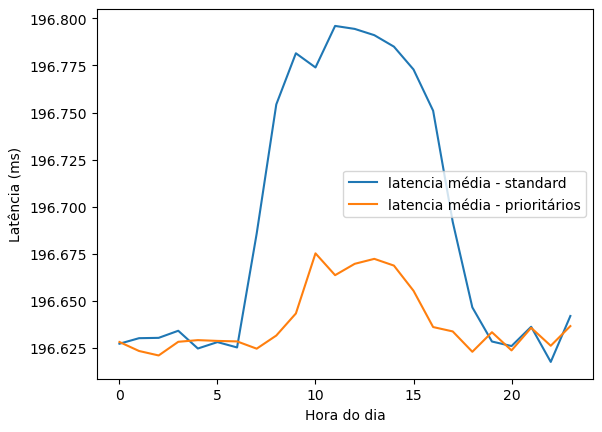

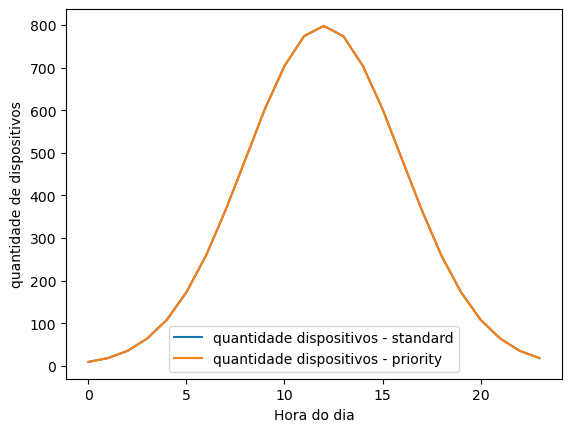

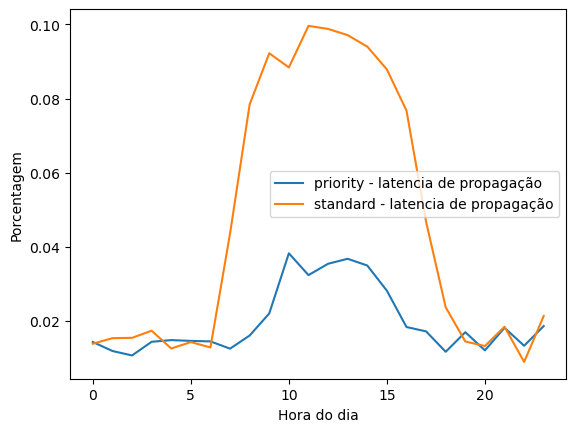

media prop latency priority:  0.019887130848784074
media prop latency standard:  0.04603125065004026


In [14]:
latency_list_fog_fog_first = []
latency_list_cloud_fog_first = []
all_devices_latency_mean_fog_first = []
num_priority_by_hour = []
num_standard_by_hour = []
perc_prop_latency_priority_list = []
perc_prop_latency_standard_list = []
package_size = 1966*(10**6)
data_link_capacity = 10 * (10**9)
transmission_latency = (package_size / data_link_capacity) * (10**3)

for i in range(len(df_by_hour)):
    print("Hour: ", i)
    sum_smallest_latency = 0
    num_priority = 0
    num_standard = 0
    latency_by_priority = 0
    processing_nodes = utilities.instantiate_processing_nodes(1, 3)
    #########################
    # ALOCATION - FOG FIRST #
    #########################
    latency_by_priority, cloud_latency, num_priority, num_standard = fog_first_alocation(devices_regions_by_hour[i], processing_nodes)
    #result = timeit.timeit(stmt='fog_first_alocation(devices_regions_by_hour[i], processing_nodes)', globals=globals(), number=1)
    #print("Alocation process time: ", result)

    media_priority_latency = latency_by_priority / num_priority
    media_cloud_latency = cloud_latency / num_standard  
    all_devices_mean = (latency_by_priority + cloud_latency) / (num_priority + num_standard)
    
    print("Latencia media prioritarios: ", media_priority_latency)
    print("Latencia media standard: ", media_cloud_latency)
    latency_list_fog_fog_first.append(media_priority_latency)
    latency_list_cloud_fog_first.append(media_cloud_latency)
    all_devices_latency_mean_fog_first.append(all_devices_mean)
    num_priority_by_hour.append(num_priority)
    num_standard_by_hour.append(num_standard)

    propagation_latency_priority = media_priority_latency - transmission_latency
    perc_prop_latency_priority = (propagation_latency_priority * 100) / media_priority_latency

    propagation_latency_standard = media_cloud_latency - transmission_latency
    perc_prop_latency_standard = (propagation_latency_standard * 100) / media_cloud_latency

    perc_prop_latency_priority_list.append(perc_prop_latency_priority)
    perc_prop_latency_standard_list.append(perc_prop_latency_standard)
    print("Porcentagem latencia prop [priority]: ", perc_prop_latency_priority)
    print("Porcentagem latencia prop [standard]: ", perc_prop_latency_standard)

pl.plot(list(range(len(df_by_hour))), latency_list_cloud_fog_first, label="latencia média - standard")
pl.plot(list(range(len(df_by_hour))), latency_list_fog_fog_first, label="latencia média - prioritários")
pl.xlabel("Hora do dia")
pl.ylabel("Latência (ms)")
pl.legend(['latencia média - standard', 'latencia média - prioritários'])
pl.show()

pl.plot(list(range(len(df_by_hour))), num_standard_by_hour, label="quantidade dispositivos - cloud")
pl.plot(list(range(len(df_by_hour))), num_priority_by_hour, label="quantidade dispositivos - fog")
pl.xlabel("Hora do dia")
pl.ylabel("quantidade de dispositivos")
pl.legend(['quantidade dispositivos - standard', 'quantidade dispositivos - priority'])
pl.show()

pl.plot(list(range(len(df_by_hour))), perc_prop_latency_priority_list, label="latencia de propagação - priority")
pl.plot(list(range(len(df_by_hour))), perc_prop_latency_standard_list, label="latencia de propagação - standard")
pl.xlabel("Hora do dia")
pl.ylabel("Porcentagem")
pl.legend(['priority - latencia de propagação', 'standard - latencia de propagação'])
pl.show()

print("media prop latency priority: ", np.mean(perc_prop_latency_priority_list))
print("media prop latency standard: ", np.mean(perc_prop_latency_standard_list))

### Alocation - Only Cloud

Hour:  0
fila prioritario =  0
fila standard =  0
Latency by priority:  1771.1640000000002  num_priority:  9
Latencia media:  196.79600000000002
Latency cloud:  1771.1640000000002  num_standard:  9
Latencia standard media:  196.79600000000002
Latencia media:  196.79600000000002
Porcentagem latencia prop [priority]:  0.09959552023416449
Porcentagem latencia prop [standard]:  0.09959552023416449
Porcentagem latencia queue [priority]:  0.0
Porcentagem latencia queue [standard]:  0.0
Hour:  1
fila prioritario =  0
fila standard =  0
Latency by priority:  3542.327999999999  num_priority:  18
Latencia media:  196.79599999999994
Latency cloud:  3542.327999999999  num_standard:  18
Latencia standard media:  196.79599999999994
Latencia media:  196.79599999999994
Porcentagem latencia prop [priority]:  0.09959552023412122
Porcentagem latencia prop [standard]:  0.09959552023412122
Porcentagem latencia queue [priority]:  0.0
Porcentagem latencia queue [standard]:  0.0
Hour:  2
fila prioritario =  0

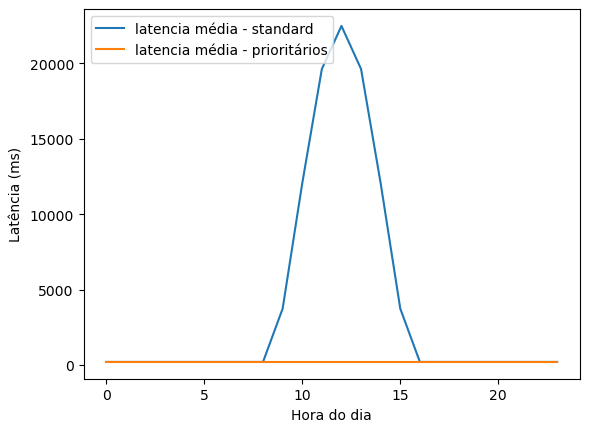

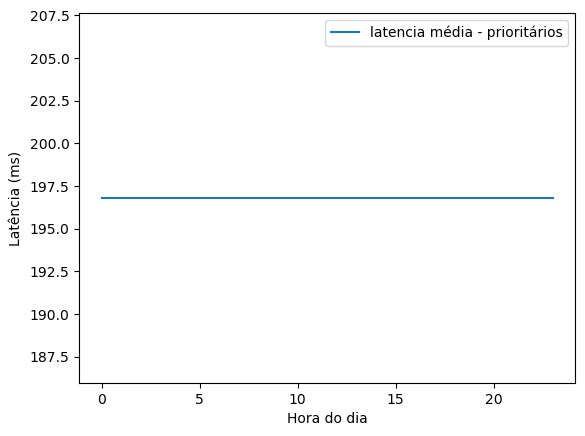

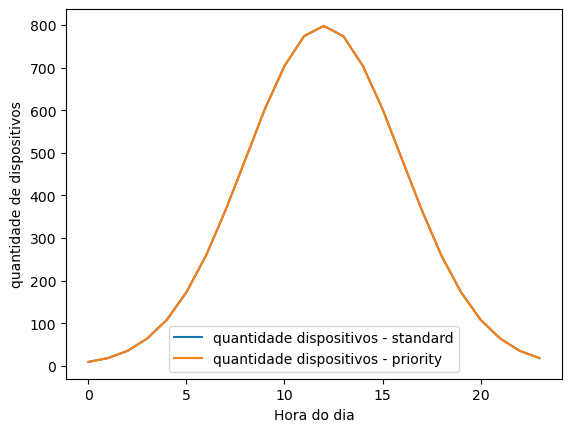

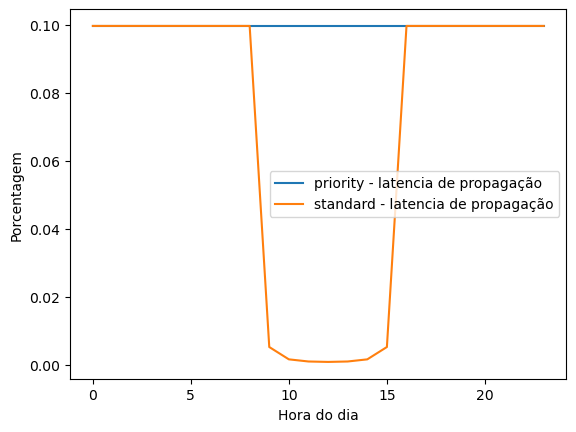

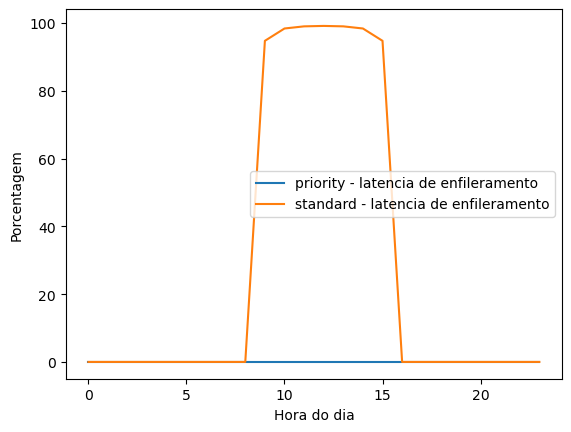

media prop latency priority:  0.09959552023443861
media prop latency standard:  0.07123948404225404
media queue latency priority:  0.0
media queue latency standard:  28.471196420653683


In [15]:
latency_list_fog_only_cloud = []
latency_list_cloud_only_cloud = []
all_devices_latency_mean_only_cloud = []
num_priority_by_hour = []
num_standard_by_hour = []
perc_prop_latency_priority_list = []
perc_prop_latency_standard_list = []
package_size = 1966*(10**6)
data_link_capacity = 10 * (10**9)
transmission_latency = (package_size / data_link_capacity) * (10**3)
perc_queue_latency_priority_list = []
perc_queue_latency_standard_list = []

for i in range(len(df_by_hour)):
    print("Hour: ", i)
    sum_smallest_latency = 0
    num_priority = 0
    num_standard = 0
    latency_by_priority = 0
    cloud_latency = 0
    num_queue_priority = 0
    num_queue_standard = 0
    priority_queue_latency = 0
    standard_queue_latency = 0
    processing_nodes = utilities.instantiate_processing_nodes(1, 3)
    ##########################
    # ALOCATION - ONLY CLOUD #
    ##########################
    latency_by_priority, cloud_latency, num_priority, num_standard, num_queue_priority, num_queue_standard, priority_queue_latency, standard_queue_latency = alocation_cloud_only(devices_regions_by_hour[i], processing_nodes)
    #result = timeit.timeit(stmt='alocation_cloud_only(devices_regions_by_hour[i], processing_nodes)', globals=globals(), number=1)
    #print("Alocation process time: ", result)
    print("fila prioritario = ", num_queue_priority)
    print("fila standard = ", num_queue_standard)

    media_priority_latency = latency_by_priority / num_priority
    media_cloud_latency = cloud_latency / num_standard
    all_devices_mean = (latency_by_priority + cloud_latency) / (num_priority + num_standard)
    
    print("Latency by priority: ", latency_by_priority, " num_priority: ", num_priority)
    print("Latencia media: ", media_priority_latency)

    print("Latency cloud: ", cloud_latency, " num_standard: ", num_standard)
    print("Latencia standard media: ", media_cloud_latency)
    
    print("Latencia media: ", media_priority_latency)
    latency_list_fog_only_cloud.append(round(media_priority_latency, 5))
    latency_list_cloud_only_cloud.append(media_cloud_latency)
    all_devices_latency_mean_only_cloud.append(all_devices_mean)
    num_priority_by_hour.append(num_priority)
    num_standard_by_hour.append(num_standard)

    queue_latency_priority = priority_queue_latency / num_priority
    propagation_latency_priority = media_priority_latency - (transmission_latency + queue_latency_priority)
    perc_prop_latency_priority = (propagation_latency_priority * 100) / media_priority_latency
    perc_queue_latency_priority = (queue_latency_priority * 100) / media_cloud_latency

    queue_latency_standard = standard_queue_latency / num_standard
    propagation_latency_standard = media_cloud_latency - (transmission_latency + queue_latency_standard)
    perc_prop_latency_standard = (propagation_latency_standard * 100) / media_cloud_latency
    perc_queue_latency_standard = (queue_latency_standard * 100) / media_cloud_latency

    perc_prop_latency_priority_list.append(perc_prop_latency_priority)
    perc_prop_latency_standard_list.append(perc_prop_latency_standard)
    perc_queue_latency_priority_list.append(perc_queue_latency_priority)
    perc_queue_latency_standard_list.append(perc_queue_latency_standard)

    print("Porcentagem latencia prop [priority]: ", perc_prop_latency_priority)
    print("Porcentagem latencia prop [standard]: ", perc_prop_latency_standard)
    print("Porcentagem latencia queue [priority]: ", perc_queue_latency_priority)
    print("Porcentagem latencia queue [standard]: ", perc_queue_latency_standard)

pl.plot(list(range(len(df_by_hour))), latency_list_cloud_only_cloud, label="latencia média - standard")
pl.plot(list(range(len(df_by_hour))), latency_list_fog_only_cloud, label="latencia média - prioritários")
pl.xlabel("Hora do dia")
pl.ylabel("Latência (ms)")
pl.legend(['latencia média - standard', 'latencia média - prioritários'])
pl.show()

pl.plot(list(range(len(df_by_hour))), latency_list_fog_only_cloud, label="latencia média - prioritários")
pl.xlabel("Hora do dia")
pl.ylabel("Latência (ms)")
pl.legend(['latencia média - prioritários'])
pl.show()

pl.plot(list(range(len(df_by_hour))), num_standard_by_hour, label="quantidade dispositivos - fila")
pl.plot(list(range(len(df_by_hour))), num_priority_by_hour, label="quantidade dispositivos - cloud")
pl.xlabel("Hora do dia")
pl.ylabel("quantidade de dispositivos")
pl.legend(['quantidade dispositivos - standard', 'quantidade dispositivos - priority'])
pl.show()

pl.plot(list(range(len(df_by_hour))), perc_prop_latency_priority_list, label="latencia de propagação - priority")
pl.plot(list(range(len(df_by_hour))), perc_prop_latency_standard_list, label="latencia de propagação - standard")
pl.xlabel("Hora do dia")
pl.ylabel("Porcentagem")
pl.legend(['priority - latencia de propagação', 'standard - latencia de propagação'])
pl.show()

pl.plot(list(range(len(df_by_hour))), perc_queue_latency_priority_list, label="latencia de enfileramento - priority")
pl.plot(list(range(len(df_by_hour))), perc_queue_latency_standard_list, label="latencia de enfileramento - standard")
pl.xlabel("Hora do dia")
pl.ylabel("Porcentagem")
pl.legend(['priority - latencia de enfileramento', 'standard - latencia de enfileramento'])
pl.show()

print("media prop latency priority: ", np.mean(perc_prop_latency_priority_list))
print("media prop latency standard: ", np.mean(perc_prop_latency_standard_list))
print("media queue latency priority: ", np.mean(perc_queue_latency_priority_list))
print("media queue latency standard: ", np.mean(perc_queue_latency_standard_list))


### Alocation - Only Fog

Hour:  0
Latency by priority:  1769.6528745518247  num_priority:  9
Latencia media:  196.62809717242496
Latency cloud:  1769.644598757749  num_standard:  9
Latencia standard media:  196.6271776397499
Latencia media:  196.62809717242496
Porcentagem latencia prop [priority]:  0.01428950024386659
Porcentagem latencia prop [standard]:  0.013821914181009925
Porcentagem latencia queue [priority]:  0.0
Porcentagem latencia queue [standard]:  0.0
Hour:  1
Latency by priority:  3539.219673520201  num_priority:  18
Latencia media:  196.62331519556673
Latency cloud:  3539.3421963655337  num_standard:  18
Latencia standard media:  196.63012202030743
Latencia media:  196.62331519556673
Porcentagem latencia prop [priority]:  0.011857798015229376
Porcentagem latencia prop [standard]:  0.015319128116250627
Porcentagem latencia queue [priority]:  0.0
Porcentagem latencia queue [standard]:  0.0
Hour:  2
Latency by priority:  6881.733125488284  num_priority:  35
Latencia media:  196.62094644252238
Latenc

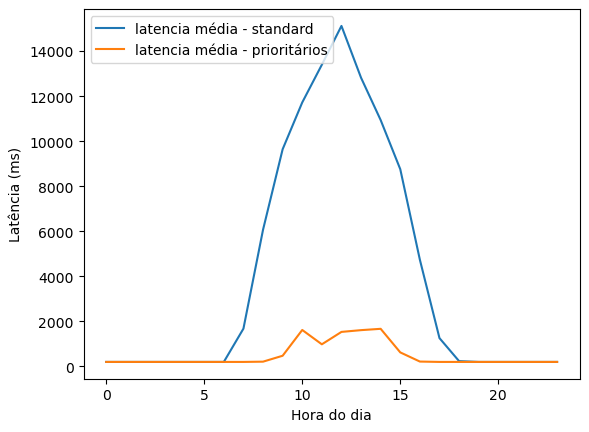

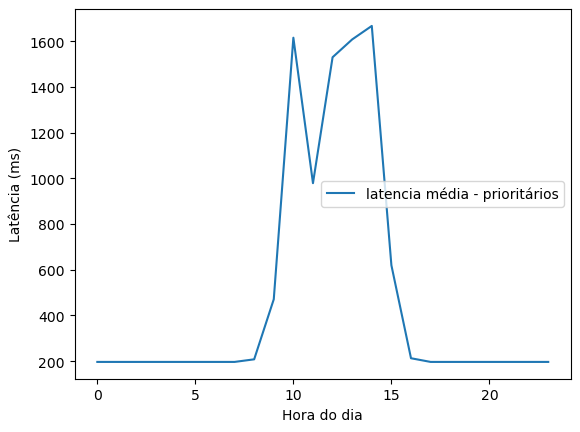

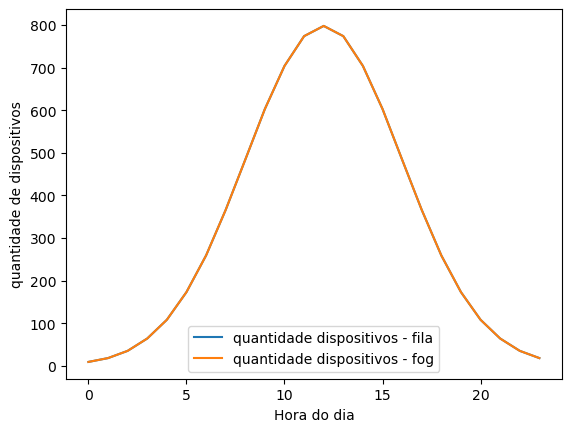

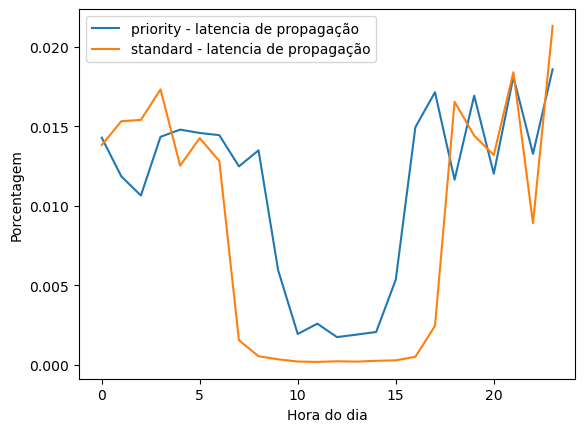

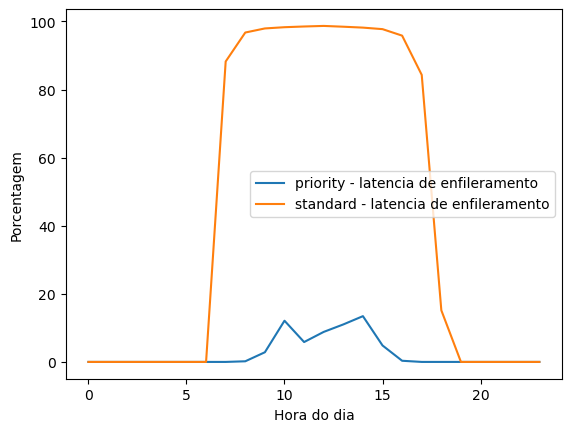

media prop latency priority:  0.011050690178633514
media prop latency standard:  0.008379907605095256
media queue latency priority:  2.4757890399628493
media queue latency standard:  44.51151139674496


In [16]:
latency_list_fog_only_fog = []
latency_list_cloud_only_fog = []
all_devices_latency_mean_only_fog = []
num_priority_by_hour = []
num_standard_by_hour = []
perc_prop_latency_priority_list = []
perc_prop_latency_standard_list = []
package_size = 1966*(10**6)
data_link_capacity = 10 * (10**9)
transmission_latency = (package_size / data_link_capacity) * (10**3)
perc_queue_latency_priority_list = []
perc_queue_latency_standard_list = []

for i in range(len(df_by_hour)):
    print("Hour: ", i)
    sum_smallest_latency = 0
    num_priority = 0
    num_standard = 0
    latency_by_priority = 0
    num_queue_priority = 0
    num_queue_standard = 0
    priority_queue_latency = 0
    standard_queue_latency = 0
    processing_nodes = utilities.instantiate_processing_nodes(1, 3)

    ########################
    # ALOCATION - ONLY FOG #
    ########################
    latency_by_priority, cloud_latency, num_priority, num_standard, num_queue_priority, num_queue_standard, priority_queue_latency, standard_queue_latency = alocation_fog_only(devices_regions_by_hour[i], processing_nodes)
    #result = timeit.timeit(stmt='alocation_fog_only(devices_regions_by_hour[i], processing_nodes)', globals=globals(), number=1)
    #print("Alocation process time: ", result)

    media_priority_latency = latency_by_priority / num_priority
    media_cloud_latency = cloud_latency / num_standard
    all_devices_mean = (latency_by_priority + cloud_latency) / (num_priority + num_standard)

    print("Latency by priority: ", latency_by_priority, " num_priority: ", num_priority)
    print("Latencia media: ", media_priority_latency)

    print("Latency cloud: ", cloud_latency, " num_standard: ", num_standard)
    print("Latencia standard media: ", media_cloud_latency)
    
    print("Latencia media: ", media_priority_latency)
    latency_list_fog_only_fog.append(media_priority_latency)
    latency_list_cloud_only_fog.append(media_cloud_latency)
    all_devices_latency_mean_only_fog.append(all_devices_mean)
    num_priority_by_hour.append(num_priority)
    num_standard_by_hour.append(num_standard)

    queue_latency_priority = priority_queue_latency / num_priority
    propagation_latency_priority = media_priority_latency - (transmission_latency + queue_latency_priority)
    perc_prop_latency_priority = (propagation_latency_priority * 100) / media_priority_latency
    perc_queue_latency_priority = (queue_latency_priority * 100) / media_cloud_latency

    queue_latency_standard = standard_queue_latency / num_standard
    propagation_latency_standard = media_cloud_latency - (transmission_latency + queue_latency_standard)
    perc_prop_latency_standard = (propagation_latency_standard * 100) / media_cloud_latency
    perc_queue_latency_standard = (queue_latency_standard * 100) / media_cloud_latency

    perc_prop_latency_priority_list.append(perc_prop_latency_priority)
    perc_prop_latency_standard_list.append(perc_prop_latency_standard)
    perc_queue_latency_priority_list.append(perc_queue_latency_priority)
    perc_queue_latency_standard_list.append(perc_queue_latency_standard)

    print("Porcentagem latencia prop [priority]: ", perc_prop_latency_priority)
    print("Porcentagem latencia prop [standard]: ", perc_prop_latency_standard)
    print("Porcentagem latencia queue [priority]: ", perc_queue_latency_priority)
    print("Porcentagem latencia queue [standard]: ", perc_queue_latency_standard)

pl.plot(list(range(len(df_by_hour))), latency_list_cloud_only_fog, label="latencia média - standard")
pl.plot(list(range(len(df_by_hour))), latency_list_fog_only_fog, label="latencia média - prioritários")
pl.xlabel("Hora do dia")
pl.ylabel("Latência (ms)")
pl.legend(['latencia média - standard', 'latencia média - prioritários'])
pl.show()

pl.plot(list(range(len(df_by_hour))), latency_list_fog_only_fog, label="latencia média - prioritários")
pl.xlabel("Hora do dia")
pl.ylabel("Latência (ms)")
pl.legend(['latencia média - prioritários'])
pl.show()

pl.plot(list(range(len(df_by_hour))), num_standard_by_hour, label="quantidade dispositivos - fila")
pl.plot(list(range(len(df_by_hour))), num_priority_by_hour, label="quantidade dispositivos - fog")
pl.xlabel("Hora do dia")
pl.ylabel("quantidade de dispositivos")
pl.legend(['quantidade dispositivos - fila', 'quantidade dispositivos - fog'])
pl.show()

pl.plot(list(range(len(df_by_hour))), perc_prop_latency_priority_list, label="latencia de propagação - priority")
pl.plot(list(range(len(df_by_hour))), perc_prop_latency_standard_list, label="latencia de propagação - standard")
pl.xlabel("Hora do dia")
pl.ylabel("Porcentagem")
pl.legend(['priority - latencia de propagação', 'standard - latencia de propagação'])
pl.show()

pl.plot(list(range(len(df_by_hour))), perc_queue_latency_priority_list, label="latencia de enfileramento - priority")
pl.plot(list(range(len(df_by_hour))), perc_queue_latency_standard_list, label="latencia de enfileramento - standard")
pl.xlabel("Hora do dia")
pl.ylabel("Porcentagem")
pl.legend(['priority - latencia de enfileramento', 'standard - latencia de enfileramento'])
pl.show()

print("media prop latency priority: ", np.mean(perc_prop_latency_priority_list))
print("media prop latency standard: ", np.mean(perc_prop_latency_standard_list))
print("media queue latency priority: ", np.mean(perc_queue_latency_priority_list))
print("media queue latency standard: ", np.mean(perc_queue_latency_standard_list))

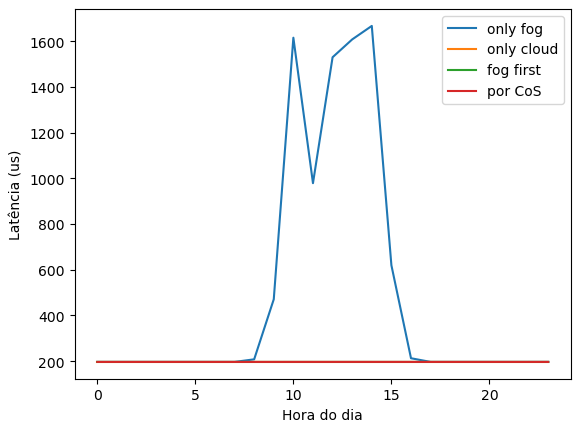

In [17]:
pl.plot(list(range(len(df_by_hour))), latency_list_fog_only_fog, label="latencia média - only_fog")
pl.plot(list(range(len(df_by_hour))), latency_list_fog_only_cloud, label="latencia média - only cloud")
pl.plot(list(range(len(df_by_hour))), latency_list_fog_fog_first, label="latencia média - fog first")
pl.plot(list(range(len(df_by_hour))), latency_list_fog_by_priority, label="latencia média - por CoS")
pl.xlabel("Hora do dia")
pl.ylabel("Latência (us)")
pl.legend(['only fog', 'only cloud', 'fog first', 'por CoS'])
pl.show()

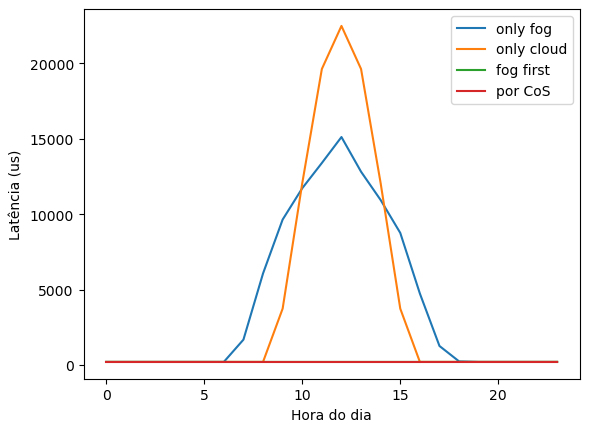

In [18]:
pl.plot(list(range(len(df_by_hour))), latency_list_cloud_only_fog, label="latencia média - only_fog")
pl.plot(list(range(len(df_by_hour))), latency_list_cloud_only_cloud, label="latencia média - only cloud")
pl.plot(list(range(len(df_by_hour))), latency_list_cloud_fog_first, label="latencia média - fog first")
pl.plot(list(range(len(df_by_hour))), latency_list_cloud_by_priority, label="latencia média - por CoS")
pl.xlabel("Hora do dia")
pl.ylabel("Latência (us)")
pl.legend(['only fog', 'only cloud', 'fog first', 'por CoS'])
pl.show()

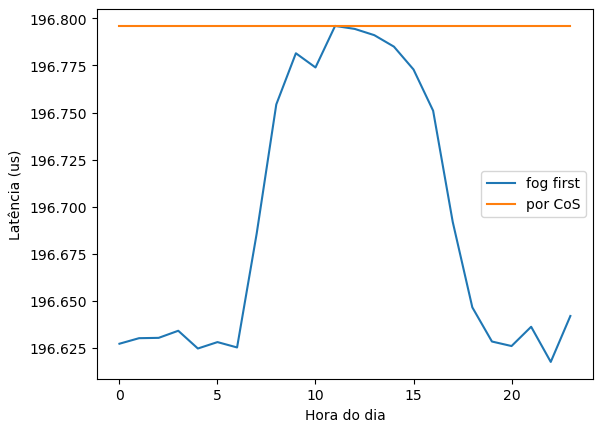

In [19]:
pl.plot(list(range(len(df_by_hour))), latency_list_cloud_fog_first, label="latencia média - fog first")
pl.plot(list(range(len(df_by_hour))), latency_list_cloud_by_priority, label="latencia média - por CoS")
pl.xlabel("Hora do dia")
pl.ylabel("Latência (us)")
pl.legend(['fog first', 'por CoS'])
pl.show()

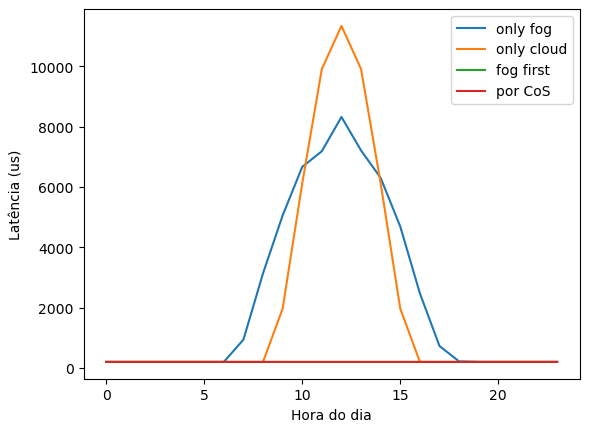

In [20]:
pl.plot(list(range(len(df_by_hour))), all_devices_latency_mean_only_fog, label="latencia média - only_fog")
pl.plot(list(range(len(df_by_hour))), all_devices_latency_mean_only_cloud, label="latencia média - only cloud")
pl.plot(list(range(len(df_by_hour))), all_devices_latency_mean_fog_first, label="latencia média - fog first")
pl.plot(list(range(len(df_by_hour))), all_devices_latency_mean_by_priority, label="latencia média - por CoS")
pl.xlabel("Hora do dia")
pl.ylabel("Latência (us)")
pl.legend(['only fog', 'only cloud', 'fog first', 'por CoS'])
pl.show()

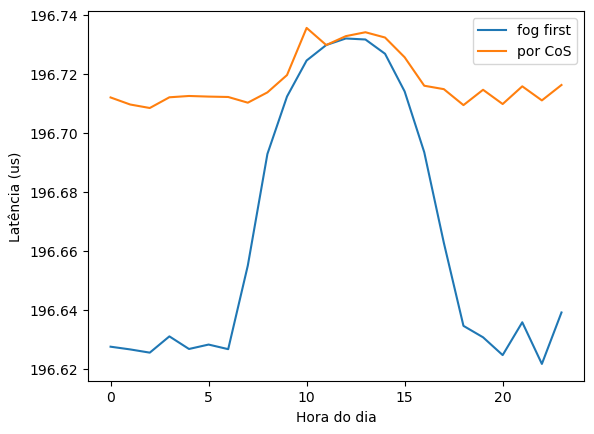

In [21]:
pl.plot(list(range(len(df_by_hour))), all_devices_latency_mean_fog_first, label="latencia média - fog first")
pl.plot(list(range(len(df_by_hour))), all_devices_latency_mean_by_priority, label="latencia média - por CoS")
pl.xlabel("Hora do dia")
pl.ylabel("Latência (us)")
pl.legend(['fog first', 'por CoS'])
pl.show()

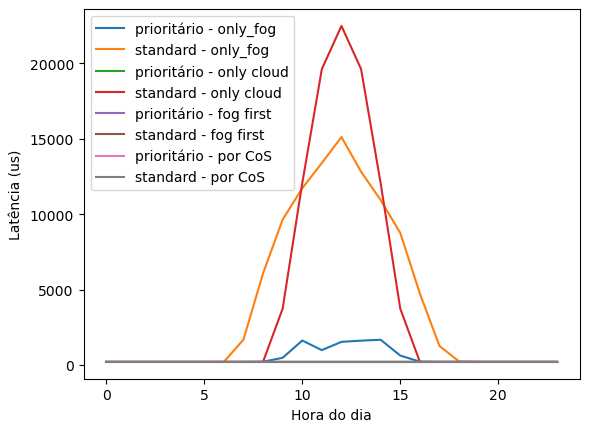

In [22]:
pl.plot(list(range(len(df_by_hour))), latency_list_fog_only_fog, label="latencia média | prioritário - only_fog")
pl.plot(list(range(len(df_by_hour))), latency_list_cloud_only_fog, label="latencia média | standard - only_fog")
pl.plot(list(range(len(df_by_hour))), latency_list_fog_only_cloud, label="latencia média | prioritário - only cloud")
pl.plot(list(range(len(df_by_hour))), latency_list_cloud_only_cloud, label="latencia média | standard - only cloud")
pl.plot(list(range(len(df_by_hour))), latency_list_fog_fog_first, label="latencia média | prioritário - fog first")
pl.plot(list(range(len(df_by_hour))), latency_list_cloud_fog_first, label="latencia média | standard - fog first")
pl.plot(list(range(len(df_by_hour))), latency_list_fog_by_priority, label="latencia média | prioritário - por CoS")
pl.plot(list(range(len(df_by_hour))), latency_list_cloud_by_priority, label="latencia média | standard - por CoS")
pl.xlabel("Hora do dia")
pl.ylabel("Latência (us)")
pl.legend(['prioritário - only_fog',
            'standard - only_fog',
            'prioritário - only cloud',
            'standard - only cloud',
            'prioritário - fog first', 
            'standard - fog first', 
            'prioritário - por CoS',
            'standard - por CoS'])
pl.show()

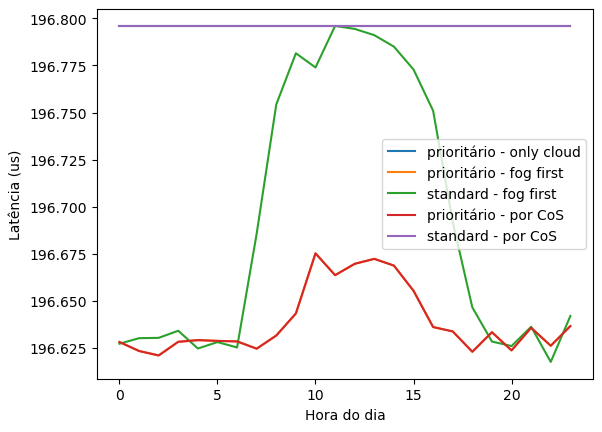

In [23]:
#pl.plot(list(range(len(df_by_hour))), latency_list_fog_only_fog, label="latencia média | prioritário - only_fog")
#pl.plot(list(range(len(df_by_hour))), latency_list_cloud_only_fog, label="latencia média | standard - only_fog")
pl.plot(list(range(len(df_by_hour))), latency_list_fog_only_cloud, label="latencia média | prioritário - only cloud")
#pl.plot(list(range(len(df_by_hour))), latency_list_cloud_only_cloud, label="latencia média | standard - only cloud")
pl.plot(list(range(len(df_by_hour))), latency_list_fog_fog_first, label="latencia média | prioritário - fog first")
pl.plot(list(range(len(df_by_hour))), latency_list_cloud_fog_first, label="latencia média | standard - fog first")
pl.plot(list(range(len(df_by_hour))), latency_list_fog_by_priority, label="latencia média | prioritário - por CoS")
pl.plot(list(range(len(df_by_hour))), latency_list_cloud_by_priority, label="latencia média | standard - por CoS")
pl.xlabel("Hora do dia")
pl.ylabel("Latência (us)")
pl.legend([#'prioritário - only_fog',
#            'standard - only_fog',
            'prioritário - only cloud',
#            'standard - only cloud',
            'prioritário - fog first', 
            'standard - fog first', 
            'prioritário - por CoS',
            'standard - por CoS'])
pl.show()